# 十、决策树算法(ID3、C4.5、CART算法)

## 1.决策树算法简述

决策树算法是一个经典的分类算法，当然也可以用于回归。同时经常会结合集成学习比如随机森林算法。可以参考图片对决策树有一个直观的理解，其实决策树就是构建一个数结构，决策树的构建关键步骤是如何找出特征判断条件。以下介绍的ID3, C4.5和CART分别基于信息增益，信息增益率，基尼系数进行特征节点选择度量标准

![image-20221026224405195](https://s2.loli.net/2022/10/26/VMdleoynSfpNUAj.png)



## 2. ID3算法

ID3算法是基于信息增益选择内部特征节点，所有特征为离散变量，只能用于分类问题。

### 2.1 信息熵

信息熵表示了事物的不确定性，越不确定的事物它的熵越大
$$
H(Y) = -\sum_{i=1}^{n_y}{p_ilogp_i}
$$

### 2.2 条件熵

条件熵度量在确定变量$X_i$后Y剩下的不确定性
$$
H(Y|X_i) = \sum_{j=1}^{n_{xi}}{p(X_i = x_j)H(Y|x_j)}
$$

### 2.3 信息增益

信息增益度量了在确定变量$X_i$后不确定性的减少程度，而ID3就是基于此选择当前剩余的所有信息增益最大的特征$X_i$ 作为内部节点
$$
I(Y, X_i) = H(Y) - H(Y|X_i)
$$

### 2.4 算法流程

决策树的生成可以用递归算法实现

1. 初始化信息增益阈值$\epsilon$
2. 判断当前样本空间样本是否为同一类输出，如果是则返回以该输出类为标记的单节点树
3. 判断此时特征空间是否已经为空，如果是则返回单节点树，标记类别为当前样本空间里实例数最多的类别
4. 计算当前各个特征X的信息增益，选择信息增益最大的特征作为内部判断节点
5. 如果当前最大特征信息增益小于阈值，返回单节点树，标记类别为当前样本空间里实例数最多的类别
6. 否则，按信息增益最大的特征将当前样本空间分为$n_x$ 份，每个不同特征取值的产生一个新子节点，所有子节点的特征空间都删除当前选中的特征，样本空间更新为当前依据此特征划分的样本子空间。

## 3. C4.5算法

ID3算法是基于信息增益选择内部特征节点，特征可以是离散或连续变量，只能用于分类问题。

### 3.1 信息增益率

随着人们使用ID3算法，发现一个问题，在相同条件下总是特征取值种类比较多的特征信息增益更大，因此，C4.5算法改进了这点，引入了信息增益率的概念。

**特征熵** 
$$
H_{X_i}(Y) = -\sum_{j=1}^{n_{xi}}{p(X_i=x_j)*log_2(p(X_i=x_j))}
$$
**信息增益率**, 可以看到当特征的取值种类越多，特征熵会越大，其在分母位置，则信息增益率会越小，因此可以修正信息增益的不足。
$$
I_R(Y, X_i) = \frac{I(Y, X_i)}{H_{X_i}(Y)}
$$

### 3.2 处理连续变量

C4.5相比ID3另外一个大的改进点在于可以处理连续变量，其处理方法是，将连续变量的取值从小到大排列，假设有m个取值，然后可以得到(m-1)个划分，我们将这(m-1)个划分转变成新的(m-1)个二元变量，该变量的划分分为小于该划分点的样本和大于该划分点的样本。

### 3.3 处理特征缺失问题

由于通常数据会存在某些特征处有缺失的问题，C4.5针对该问题对ID3进行了改进。主要解决两个问题

* 一是在样本某些特征缺失的情况下选择划分的属性

  对于第一个子问题，对于某一个有缺失特征值的特征A。C4.5的思路是将数据分成两部分，对每个样本设置一个权重（初始可以都为1），然后划分数据，一部分是有特征值A的数据D1，另一部分是没有特征A的数据D2. 然后对于没有缺失特征A的数据集D1来和对应的A特征的各个特征值一起计算加权重后的信息增益比，最后乘上一个系数，这个系数是无特征A缺失的样本加权后所占加权总样本的比例。

* 二是选定了划分属性，对于在该属性上缺失特征的样本的处理。

  对于第二个子问题，可以将缺失特征的样本同时划分入所有的子节点，不过将该样本的权重按各个子节点样本的数量比例来分配。比如缺失特征A的样本a之前权重为1，特征A有3个特征值A1,A2,A3。 3个特征值对应的无缺失A特征的样本个数为2,3,4.则a同时划分入A1，A2，A3。对应权重调节为2/9,3/9, 4/9。

### 3.4 处理过拟合问题

ID3构造的决策树还有一个很大的问题是，树叶节点容易分的很多，也就是容易出现过拟合问题，因此需要剪枝处理。这里我不太清楚C4.5是如何剪枝的，参看的是刘建平的博客，似乎和CART算法的剪枝方法是相同的？

## 4. CART算法

C4.5算法还有一个问题是基于熵度量需要计算log，相对计算比较复杂，另外还有C4.5的决策树是多叉树，推断效率不如二叉树。CART算法基于此进行了改进，以基尼系数作为度量。另外CART在生成决策树后，会引入了正则化系数进行的剪枝，然后基于交叉验证选择最佳的正则化系数对应的剪枝后的决策树。最后，除了可以处理回归问题，CART也可以处理回归问题。

### 4.1 基尼系数

基尼系数代表了模型的不纯度，基尼系数越小，则不纯度越低，特征越好。这和信息增益(比)是相反的。

具体的，在分类问题中，假设有K个类别，第k个类别的概率为$p_k$, 则基尼系数的表达式为：
$$
Gini(Y) = \sum_{k=1}^K{p_k(1-p_k)}=1-\sum_{k=1}^K{p_k^2}
$$
特别的，对于样本D,如果根据特征A的某个值a,把D分成D1和D2两部分，则在特征A的条件下，D的基尼系数表达式为：
$$
Gini(D,A) = \frac{|D_1|}{|D|}*Gini(D_1)+\frac{|D_2|}{|D|}*Gini(D_2)
$$

### 4.2 CART处理离散特征点

相比较C4.5算法，CART处理连续特征是相同的，都是基于划分生成二分类节点。但对于离散特征，C4.5和ID3算法是直接基于离散特征值分为多个子节点，但由于多叉树的推导效率不如二叉树，CART算法针对该问题进行了改进。它采用的思路也是二分离散特征，将离散特征值分为两个集合，然后在选取最小基尼系数时，要对每个离散特征上的所有二元划分计算基尼系数，然后求出最小的基尼系数对应的特征和划分。其实和连续特征变量相似。

### 4.3 决策回归树

CART算法用于回归问题时和分类决策树其实只有两点不同，一是推断时分类算法用的是样本子空间里的最多类别标签作为判断类别，而回归问题是用最后的叶节点样本子空间的均值或者中位数作为推断的回归值。二是回归树不用基尼系数，二是用方差和

![image-20221026215524527](https://s2.loli.net/2022/10/26/wKqQvIsb3zceYl1.png)

### 4.4 剪枝

剪枝避免过拟合的方法是加入正则化系数，然后抽象的来看每个子节点，选择是否保留还是剪枝就基于计算剪枝的损失函数，这里的损失其实就是基尼系数或者方法，但加入了树的叶子节点数乘以系数作为惩罚项。假设保留子树的损失为
$$
C_\alpha(T_t)=C(T_t)+\alpha|T_t|
$$


剪掉该子树的决策数T的损失为
$$
C_\alpha{T}=C(T) + \alpha|T|
$$
我们可以观察到，当$\alpha$ 等于0或者很小时，剪枝后的T的损失一定会大于不剪枝的树的损失，因为不剪枝划分的空间更多，所以不纯度肯定低于剪枝的数T。那么当正则化系数很大时呢？因为不剪枝的树叶节点更多，则随着正则化系数越来越大，不剪枝的损失会比剪枝T的损失增长的快！那么当正则化系数刚好使两个损失相等时呢？我们得到
$$
\alpha = \frac{C(T)-C(T_t)}{|T_t|-|T|}
$$
生成决策树后对于每个内部节点我们都可以计算一个这样的阈值，因为等式右侧都是可计算的。

所以当给定一个正则化系数，从根节点出发边里每个内部节点，如果此内部节点的系数阈值大于我们给的正则化系数，则我们选择剪枝；反之则选择不剪枝。



## 5. 决策树算法小结

![image-20221026223129782](https://s2.loli.net/2022/10/26/G7pe5ia9mbg3CKz.png)

## 6. sklearn实现

[1 0 1 0]


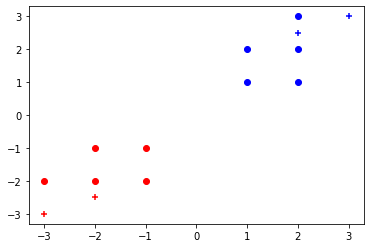

In [3]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

dt = DecisionTreeClassifier()
X = np.array([
    [1, 1],
    [2, 2],
    [1, 2],
    [2, 3],
    [2, 1],
    [-1, -1],
    [-2, -2],
    [-2, -1],
    [-1, -2],
    [-3, -2],
])
y = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=np.int8)
dt.fit(X, y)

X_test = np.array([
    [2, 2.5],
    [-2, -2.5],
    [3, 3],
    [-3, -3],
])
y_test = dt.predict(X_test)
print(y_test)

#可视化结果
pos_data = X[y==1]
neg_data = X[y==0]
plt.scatter(pos_data[:, 0], pos_data[:, 1], marker='o', color='b')
plt.scatter(neg_data[:, 0], neg_data[:, 1], marker='o', color='r')
X_test_pos = X_test[y_test==1]
X_test_neg = X_test[y_test==0]
plt.scatter(X_test_pos[:, 0], X_test_pos[:, 1], marker='+', color='b')
plt.scatter(X_test_neg[:, 0], X_test_neg[:, 1], marker='+', color='r')
plt.show()